<a href="https://colab.research.google.com/github/ScarlaAvionic/UTs_PrakMachineLearning_1227050132/blob/main/UTs_Prak_Mesin_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Viqriza Achmad Vahira

NIM  : 1227050132

Mata Kuliah : Praktikum Machine Learning

Soal 1:
Silahkan download dataset berikut: https://drive.google.com/file/d/1krLRWedghy_ysJ2N6i-1GJ-ZQUmnu6eu/view?usp=sharing
Sebagai informasi data tersebut dataset yang terdapat data dummmy untuk kredit komputer . Sehingga tugas kalian adalah membuat model untuk melakukan klasifikasi apakah seseorang layak untuk mendapatkan kredit komputer atau tidak.

Buatlah tahapan-tahapan pembuatan model klasifikasi (sampai dengan evaluasi) yang dilakukan untuk membuat model dengan menggunakan metode/ algoritma berikut:
NIM ganjil: menggunakan model Decision Tree
NIM genap: menggunakan model Naive Bayes
Tahapan dan langkah-langkah dapat dimasukkan pada file Readme masing-masing.

Soal 2:
Lakukan implementasi didalam program dengan menggunakan Python, kemudian jika sudah silahkan unggah pada akun Github masing-masing. Jika sudah, serahkan link github tersebut pada assignment UTS pada akun Eknows masing-masing

Instruksi Pengerjaan
Dikerjakan pada waktu perkuliahan praktikum dilakukan, jika sudah lakukan submit ke Github masing-masing, jika dianggap pada saat pengerjaan waktu perkuliahan praktikum belum selesai silahkan lanjutkan pengerjaan sampai dengan hari selanjutnya tepat 24 jam setelah perkuliahan praktikum selesai


Saving dataset_buys _comp.csv to dataset_buys _comp (1).csv
Files in working dir: ['.config', 'dataset_buys _comp (1).csv', 'dataset_buys _comp (2).csv', 'dataset_buys_comp.csv', 'dataset_buys _comp.csv', 'sample_data']
Dataset dimuat: 1000 baris, 5 kolom

5 baris pertama:


,Age,Income,Student,Credit_Rating,Buys_Computer
0,Tua,Tinggi,Ya,Buruk,0
1,Paruh Baya,Tinggi,Ya,Baik,1
2,Paruh Baya,Rendah,Tidak,Buruk,1
3,Tua,Rendah,Tidak,Baik,1
4,Tua,Rendah,Ya,Baik,1



Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            1000 non-null   object
 1   Income         1000 non-null   object
 2   Student        1000 non-null   object
 3   Credit_Rating  1000 non-null   object
 4   Buys_Computer  1000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 39.2+ KB
None

Statistik deskriptif:


,Age,Income,Student,Credit_Rating,Buys_Computer
count,1000,1000,1000,1000,1000.000000
unique,3,3,2,2,NaN
top,Paruh Baya,Tinggi,Ya,Buruk,NaN
freq,346,347,510,526,NaN
mean,NaN,NaN,NaN,NaN,0.669000
std,NaN,NaN,NaN,NaN,0.470809
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,1.000000



Setelah one-hot encoding: 7 fitur
Kolom target: Buys_Computer

Ukuran train/test: 700 / 300

[Naive Bayes] Model selesai dilatih.

[Naive Bayes] Confusion Matrix:
[[ 70  29]
 [ 50 151]]

[Naive Bayes] Classification Report:
              precision    recall  f1-score   support

           0     0.5833    0.7071    0.6393        99
           1     0.8389    0.7512    0.7927       201

    accuracy                         0.7367       300
   macro avg     0.7111    0.7292    0.7160       300
weighted avg     0.7546    0.7367    0.7420       300

[Naive Bayes] ROC AUC Score: 0.8172


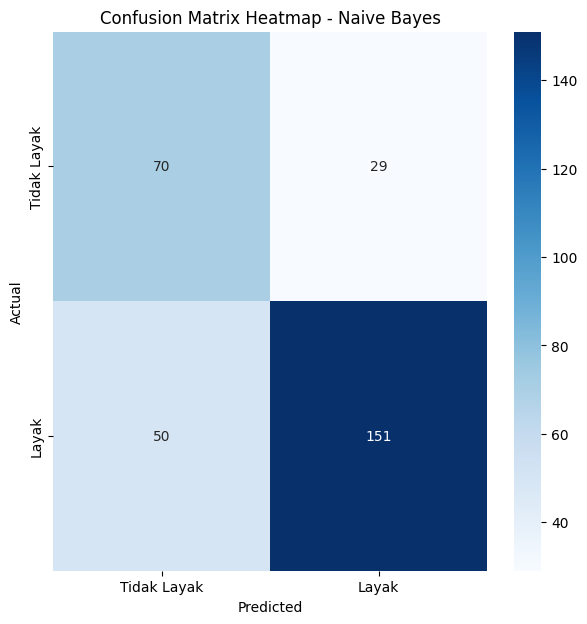

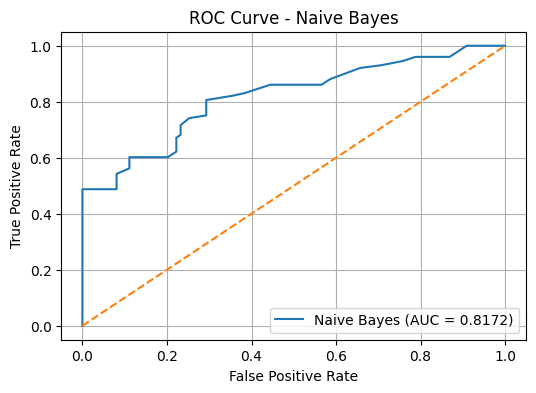

In [ ]:
# UTS Praktikum Machine Learning
# Soal 1: Klasifikasi Kelayakan Kredit Komputer
# Metode: Naive Bayes (GaussianNB)

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

# Upload dan rename dataset
uploaded = files.upload()
print("Files in working dir:", os.listdir('.'))
original = [f for f in os.listdir('.') if f.lower().startswith('dataset_buys')][0]
clean = 'dataset_buys_comp.csv'
if original != clean:
    os.rename(original, clean)

def main():
    # Load dataset
    df = pd.read_csv(clean)
    print(f"Dataset dimuat: {df.shape[0]} baris, {df.shape[1]} kolom\n")

    # EDA ringkas
    print("5 baris pertama:")
    display(df.head())
    print("\nInfo dataset:")
    print(df.info())
    print("\nStatistik deskriptif:")
    display(df.describe(include='all'))

    # Preprocessing: One-Hot Encoding
    df_enc = pd.get_dummies(df, drop_first=True)
    print(f"\nSetelah one-hot encoding: {df_enc.shape[1]} fitur")

    # Temukan kolom target
    target_cols = [c for c in df_enc.columns if 'buys_computer' in c.lower()]
    if not target_cols:
        raise ValueError("Kolom target hasil encoding tidak ditemukan.")
    target = target_cols[0]
    print("Kolom target:", target)

    # Definisikan X dan y
    X = df_enc.drop(target, axis=1)
    y = df_enc[target]

    # 6. Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.3,
        random_state=42,
        stratify=y
    )
    print(f"\nUkuran train/test: {X_train.shape[0]} / {X_test.shape[0]}")

    # Feature scaling (opsional untuk GaussianNB)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled  = scaler.transform(X_test)


    # Model 1: Gaussian Naive Bayes
    nb_model = GaussianNB()
    nb_model.fit(X_train_scaled, y_train)
    print("\n[Naive Bayes] Model selesai dilatih.")

    # Prediksi & Evaluasi NB
    y_pred_nb = nb_model.predict(X_test_scaled)
    y_prob_nb = nb_model.predict_proba(X_test_scaled)[:, 1]

    print("\n[Naive Bayes] Confusion Matrix:")
    cm_nb = confusion_matrix(y_test, y_pred_nb)
    print(cm_nb)

    print("\n[Naive Bayes] Classification Report:")
    print(classification_report(y_test, y_pred_nb, digits=4))

    auc_nb = roc_auc_score(y_test, y_prob_nb)
    print(f"[Naive Bayes] ROC AUC Score: {auc_nb:.4f}")

    # Visualisasi Naive Bayes
    fig, ax = plt.subplots(figsize=(7, 7))
    sns.heatmap(
        cm_nb,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=['Tidak Layak', 'Layak'],
        yticklabels=['Tidak Layak', 'Layak'],
        ax=ax
    )
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix Heatmap - Naive Bayes')
    plt.show()

    # ROC Curve
    fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Naive Bayes')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


if __name__ == '__main__':
    main()
